# Import Required Libraries
Import necessary libraries such as pandas, numpy, and folium for data manipulation and visualization.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import folium

### Prepare Data for Visualization
Ensure the data is cleaned and processed, including filtering coordinates, creating grid cells, and grouping data by grid_id and time intervals.

In [2]:
df = pd.read_csv('tdrive_combined.csv')
df = df.rename(columns={'taxi_id': 'id'})
df

,id,datetime,longitude,latitude
0,1,2008-02-02 15:36:08,116.51172,39.92123
1,1,2008-02-02 15:46:08,116.51135,39.93883
2,1,2008-02-02 15:46:08,116.51135,39.93883
3,1,2008-02-02 15:56:08,116.51627,39.91034
4,1,2008-02-02 16:06:08,116.47186,39.91248
...,...,...,...,...
17662979,10357,2008-02-08 17:26:51,116.72877,40.01143
17662980,10357,2008-02-08 17:26:51,116.72877,40.01143
17662981,10357,2008-02-08 17:26:51,116.72877,40.01143
17662982,10357,2008-02-08 17:26:51,116.72877,40.01143


In [3]:
df['datetime'] = pd.to_datetime(df['datetime'], format="%Y-%m-%d %H:%M:%S")
df = df.sort_values(by='datetime').set_index('datetime')
# Filter coordinates within Beijing
df = df[(df.longitude > 115.9) & (df.longitude < 117.2)]
df = df[(df.latitude > 39.5) & (df.latitude < 40.5)]
df

,id,longitude,latitude
datetime,,,
2008-02-02 13:30:44,3579,116.40048,39.90350
2008-02-02 13:30:44,3015,116.41036,39.89171
2008-02-02 13:30:44,6275,116.36838,39.90484
2008-02-02 13:30:45,7659,116.35203,39.84086
2008-02-02 13:30:45,7659,116.35203,39.84086
...,...,...,...
2008-02-08 17:39:19,7685,116.31397,39.96857
2008-02-08 17:39:19,3557,116.44487,39.93240
2008-02-08 17:39:19,3015,116.40806,39.89967


In [4]:
# # Create grid cells
# min_lon, max_lon = df.longitude.min(), df.longitude.max()
# min_lat, max_lat = df.latitude.min(), df.latitude.max()
# grid_size = 0.05  # ~5km resolution
# lon_bins = np.arange(min_lon, max_lon, grid_size)
# lat_bins = np.arange(min_lat, max_lat, grid_size)

# df['grid_id'] = df.apply(lambda row: f"{np.digitize(row.longitude, lon_bins)}_{np.digitize(row.latitude, lat_bins)}", axis=1)
# df = df.reset_index()
# # Group data by grid_id and time intervals
# traffic_data = (
#     df.groupby([pd.Grouper(key='datetime', freq='15T'), 'grid_id'])['id']
#     .nunique()
#     .reset_index()
# )
# traffic_data.columns = ['datetime', 'grid_id', 'unique_cars']
# # Compute map center
# center_lat = df.latitude.mean()
# center_lon = df.longitude.mean()

# # Create Folium Map
# m = folium.Map(
#     location=[center_lat, center_lon],
#     zoom_start=10,
#     tiles="Cartodb Positron"
# )

# # Draw grid cells as rectangles
# for grid_id in traffic_data['grid_id'].unique():
#     i_lon, i_lat = map(int, grid_id.split('_'))
#     # Ensure indices are within bounds
#     i_lon = min(i_lon, len(lon_bins) - 1)
#     i_lat = min(i_lat, len(lat_bins) - 1)
    
#     lon_min = lon_bins[i_lon - 1]
#     lon_max = lon_bins[i_lon]
#     lat_min = lat_bins[i_lat - 1]
#     lat_max = lat_bins[i_lat]
    
#     bounds = [
#         [lat_min, lon_min],
#         [lat_min, lon_max],
#         [lat_max, lon_max],
#         [lat_max, lon_min],
#     ]
    
#     folium.Polygon(
#         locations=bounds,
#         color='blue',
#         weight=1,
#         fill=False,
#         popup=f"Grid {grid_id}"
#     ).add_to(m)

# # Display map
# m

### Adjust Grid Size and Re-visualize
Change the grid size (e.g., from 5km to 10km) and re-visualize the grid cells to observe the impact on the distribution of unique cars.

In [5]:
# Adjust grid size to 10km
min_lon, max_lon = df.longitude.min(), df.longitude.max()
min_lat, max_lat = df.latitude.min(), df.latitude.max()
grid_size = 0.1  # ~10km resolution
lon_bins = np.arange(min_lon, max_lon, grid_size)
lat_bins = np.arange(min_lat, max_lat, grid_size)

df['grid_id'] = df.apply(lambda row: f"{np.digitize(row.longitude, lon_bins)}_{np.digitize(row.latitude, lat_bins)}", axis=1)
df = df.reset_index()
# Group data by grid_id and time intervals
traffic_data = (
    df.groupby([pd.Grouper(key='datetime', freq='15T'), 'grid_id'])['id']
    .nunique()
    .reset_index()
)
traffic_data.columns = ['datetime', 'grid_id', 'unique_cars']
# Compute map center
center_lat = df.latitude.mean()
center_lon = df.longitude.mean()

# Create Folium Map
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=10,
    tiles="Cartodb Positron"
)

for grid_id in traffic_data['grid_id'].unique():
    i_lon, i_lat = map(int, grid_id.split('_'))
    # Ensure indices are within bounds
    i_lon = min(i_lon, len(lon_bins) - 1)
    i_lat = min(i_lat, len(lat_bins) - 1)
    
    lon_min = lon_bins[i_lon - 1]
    lon_max = lon_bins[i_lon]
    lat_min = lat_bins[i_lat - 1]
    lat_max = lat_bins[i_lat]
    
    bounds = [
        [lat_min, lon_min],
        [lat_min, lon_max],
        [lat_max, lon_max],
        [lat_max, lon_min],
    ]
    
    folium.Polygon(
        locations=bounds,
        color='blue',
        weight=1,
        fill=False,
        popup=f"Grid {grid_id}"
    ).add_to(m)

m

/tmp/ipykernel_214528/1335215297.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df.groupby([pd.Grouper(key='datetime', freq='15T'), 'grid_id'])['id']


**10 km resolution looks fine**

### Estimate the vehicle normalisation factor

According to https://language.chinadaily.com.cn/trans/2011-10/17/content_13918879.htm, there was 66,646 registered taxis in Beijing in 2008. Remember that our dataset track 10,357 taxis.

Using https://2008.sohu.com/20070619/n250659878.shtml and https://hk.crntt.com/doc/1014/5/7/8/101457843_3.html?coluid=37&kindid=711&docid=101457843&mdate=0927121427, we can estimate that in 2008 the total number of vehicles in Beijing can be estimated as 3.5 million. In this case, the the proportion of taxis was 1.9%

Finally, it is necessary to take into account that an average taxi drives more than an average private vehicle. Hence, the influence of taxis on the traffic is higher than 1.9%. Let's assume that the average taxi travels 5 times more than the average private vehicle. Hence, the proportion of taxis in the total number of vehicles is 9.5%.

Limitations:

+ We assume that the average taxi travels 5 times more than the average private vehicle, and this assumption is not supported by the data.

+ Some areas might be more popular among the taxis than others. Hence, the distribution of taxis in the city might be different from the distribution of private vehicles. Hence, the approach might not be very accurate.

+ Nevertheless, the main goal of the study is not to estimate the traffic data exactly, but to understand the ways to use AI to mitigate the traffic load. Hence, we can continue the analysis by using this approach.

In [6]:
traffic_data

,datetime,grid_id,unique_cars
0,2008-02-02 13:30:00,10_10,1
1,2008-02-02 13:30:00,10_2,2
2,2008-02-02 13:30:00,10_3,5
3,2008-02-02 13:30:00,10_4,2
4,2008-02-02 13:30:00,10_5,1
...,...,...,...
59495,2008-02-08 17:30:00,9_5,14
59496,2008-02-08 17:30:00,9_6,26
59497,2008-02-08 17:30:00,9_7,27
59498,2008-02-08 17:30:00,9_8,22


In [8]:
proportion_of_taxis = 0.095
all_taxis_multiplier = 66646 / 10357
traffic_multiplier = all_taxis_multiplier / proportion_of_taxis
traffic_multiplier

67.73552593465898

**We need to round the multiplies. Since it is better to underestimate the traffic rather than overestimate it in order to avoid detecting too much false positive anomalies, we will use 65 as the final multiplier.**

In [9]:
final_traffic_multiplier = 65

In [10]:
traffic_data['estimated_traffic'] = traffic_data['unique_cars'] * final_traffic_multiplier
traffic_data

,datetime,grid_id,unique_cars,estimated_traffic
0,2008-02-02 13:30:00,10_10,1,65
1,2008-02-02 13:30:00,10_2,2,130
2,2008-02-02 13:30:00,10_3,5,325
3,2008-02-02 13:30:00,10_4,2,130
4,2008-02-02 13:30:00,10_5,1,65
...,...,...,...,...
59495,2008-02-08 17:30:00,9_5,14,910
59496,2008-02-08 17:30:00,9_6,26,1690
59497,2008-02-08 17:30:00,9_7,27,1755
59498,2008-02-08 17:30:00,9_8,22,1430


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

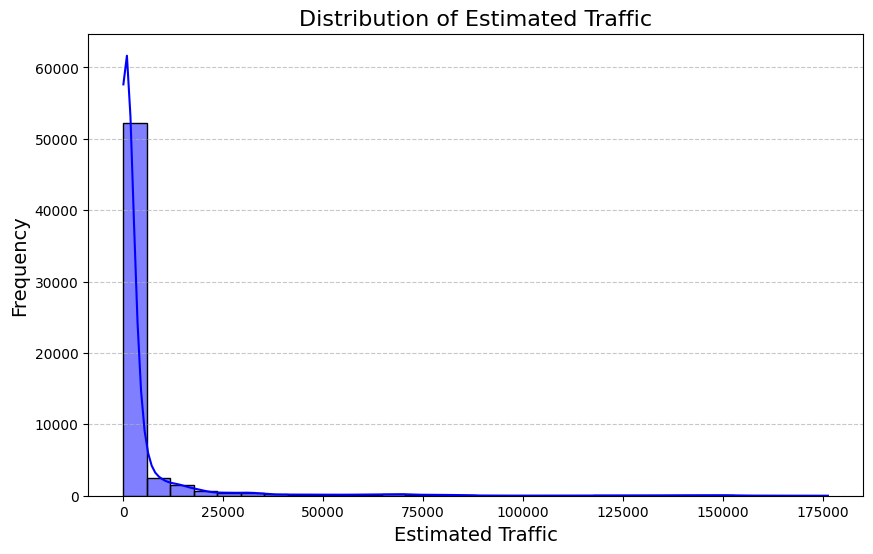

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(traffic_data['estimated_traffic'], kde=True, bins=30, color='blue')
plt.title('Distribution of Estimated Traffic', fontsize=16)
plt.xlabel('Estimated Traffic', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
traffic_data['estimated_traffic'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count     59500.000000
mean       4679.627479
std       15062.275772
min          65.000000
1%           65.000000
5%           65.000000
10%          65.000000
25%         260.000000
50%         845.000000
75%        2210.000000
90%        8515.000000
95%       19630.000000
99%       79040.650000
max      176280.000000
Name: estimated_traffic, dtype: float64

### Many situations where the estimated traffic is 65, meaning that there was just one taxi in the grid. Hence, there should be many missed data points, when the estimated traffic is 0, so it was not recorded

In [18]:
# Create a complete set of all combinations of datetime and grid_id
all_combinations = pd.MultiIndex.from_product(
    [traffic_data['datetime'].unique(), traffic_data['grid_id'].unique()],
    names=['datetime', 'grid_id']
)

# Reindex the traffic_data DataFrame to include all combinations
traffic_data = traffic_data.set_index(['datetime', 'grid_id']).reindex(all_combinations, fill_value=0).reset_index()

# Ensure unique_cars and estimated_traffic are set to 0 for missing combinations
traffic_data['unique_cars'] = traffic_data['unique_cars'].fillna(0).astype(int)
traffic_data['estimated_traffic'] = traffic_data['estimated_traffic'].fillna(0).astype(int)

traffic_data

,datetime,grid_id,unique_cars,estimated_traffic
0,2008-02-02 13:30:00,10_10,1,65
1,2008-02-02 13:30:00,10_2,2,130
2,2008-02-02 13:30:00,10_3,5,325
3,2008-02-02 13:30:00,10_4,2,130
4,2008-02-02 13:30:00,10_5,1,65
...,...,...,...,...
76955,2008-02-08 17:30:00,13_4,0,0
76956,2008-02-08 17:30:00,13_2,0,0
76957,2008-02-08 17:30:00,12_2,1,65
76958,2008-02-08 17:30:00,1_8,0,0


In [19]:
traffic_data['estimated_traffic'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count     76960.000000
mean       3617.955236
std       13388.124596
min           0.000000
1%            0.000000
5%            0.000000
10%           0.000000
25%          65.000000
50%         390.000000
75%        1625.000000
90%        5525.000000
95%       14820.000000
99%       71695.000000
max      176280.000000
Name: estimated_traffic, dtype: float64

In [20]:
traffic_data.grid_id.nunique()

130

### Filter the grids that do not have much traffic activity, since we assume that there is a reason for such a low traffic there

Conditions will be simple:

+ estimated traffic per day is less than 100
+ more than 50% of the observations within the grid_cell have the estimated traffic equal to 0

In [34]:
traffic_data.datetime.min(), traffic_data.datetime.max()

(Timestamp('2008-02-02 13:30:00'), Timestamp('2008-02-08 17:30:00'))

In [35]:
traffic_data['date'] = traffic_data['datetime'].dt.date
daily_traffic = traffic_data.groupby(['grid_id', 'date'])['estimated_traffic'].sum().reset_index()
daily_traffic

,grid_id,date,estimated_traffic
0,10_1,2008-02-02,455
1,10_1,2008-02-03,455
2,10_1,2008-02-04,715
3,10_1,2008-02-05,1040
4,10_1,2008-02-06,910
...,...,...,...
905,9_9,2008-02-04,20410
906,9_9,2008-02-05,73580
907,9_9,2008-02-06,161460
908,9_9,2008-02-07,172575


In [36]:
filted_grids_1 = daily_traffic.loc[daily_traffic['estimated_traffic'] < 100].grid_id.to_list()
len(filted_grids_1)

27

In [37]:
zero_traffic_percentage = traffic_data.groupby('grid_id')['estimated_traffic'].apply(lambda x: (x == 0).mean())
filter_grids_2 = zero_traffic_percentage.loc[zero_traffic_percentage > 0.5].index.to_list()
len(filter_grids_2)

27

In [38]:
grid_ids_to_filter = list(set(filted_grids_1 + filter_grids_2))
grid_ids_to_filter

['7_10',
 '12_4',
 '8_1',
 '13_3',
 '13_1',
 '2_8',
 '11_5',
 '6_10',
 '13_2',
 '7_1',
 '13_4',
 '8_10',
 '4_10',
 '12_1',
 '1_5',
 '4_9',
 '12_2',
 '1_6',
 '1_7',
 '11_1',
 '13_5',
 '12_3',
 '11_2',
 '9_1',
 '5_10',
 '12_5',
 '1_8',
 '6_9',
 '3_10',
 '10_1']

In [39]:
len(grid_ids_to_filter)

30

In [41]:
# Calculate the percentage of observations with estimated_traffic = 0 for each grid_id
filtered_traffic_data = traffic_data[~traffic_data['grid_id'].isin(grid_ids_to_filter)]
filtered_traffic_data.index = range(len(filtered_traffic_data))
filtered_traffic_data

,datetime,grid_id,unique_cars,estimated_traffic,date
0,2008-02-02 13:30:00,10_10,1,65,2008-02-02
1,2008-02-02 13:30:00,10_2,2,130,2008-02-02
2,2008-02-02 13:30:00,10_3,5,325,2008-02-02
3,2008-02-02 13:30:00,10_4,2,130,2008-02-02
4,2008-02-02 13:30:00,10_5,1,65,2008-02-02
...,...,...,...,...,...
59195,2008-02-08 17:30:00,3_1,6,390,2008-02-08
59196,2008-02-08 17:30:00,4_1,7,455,2008-02-08
59197,2008-02-08 17:30:00,1_4,8,520,2008-02-08
59198,2008-02-08 17:30:00,3_9,2,130,2008-02-08


In [42]:
filtered_traffic_data.grid_id.nunique()

100

In [43]:
filtered_traffic_data = filtered_traffic_data.drop(columns=['date', 'unique_cars'])
filtered_traffic_data.to_csv('filtered_normalised_traffic_data.csv', index=False)

Funny, exactly 100 left

**Let's visualize them**

In [44]:
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=10,
    tiles="Cartodb Positron"
)

for grid_id in filtered_traffic_data['grid_id'].unique():
    i_lon, i_lat = map(int, grid_id.split('_'))
    # Ensure indices are within bounds
    i_lon = min(i_lon, len(lon_bins) - 1)
    i_lat = min(i_lat, len(lat_bins) - 1)
    
    lon_min = lon_bins[i_lon - 1]
    lon_max = lon_bins[i_lon]
    lat_min = lat_bins[i_lat - 1]
    lat_max = lat_bins[i_lat]
    
    bounds = [
        [lat_min, lon_min],
        [lat_min, lon_max],
        [lat_max, lon_max],
        [lat_max, lon_min],
    ]
    
    folium.Polygon(
        locations=bounds,
        color='blue',
        weight=1,
        fill=False,
        popup=f"Grid {grid_id}"
    ).add_to(m)

m